## Report 1: Greedy heuristics

* Radosław Winiecki, 148244
* Oskar Szudzik, 148245
* Alicja Kasicka, 148246

Source code: https://github.com/Oskshust/evo_comp/tree/main/1

#### PROBLEM DESCRIPTION:
In our case, a path is a Hamiltonian cycle formed by connecting 50% of the vertices that appear on a plane. The best path is the one for which the cost of taking it is the lowest.   

The aim of the problem is to compare the paths created by two greedy heuristics that differ in the way they choose the next vertex to be added- nearest neighbor and greedy cycle and a random solution. We run each greedy method 200 times- each time we chose the different vertex as the starting node. For the random method, the starting vertex is chosen randomly in every iteration.

In [1]:
from scripts import *

print(get_dist_matrix("../data/TSPA.csv"))

[[  inf 2032. 2098. ... 4159. 3783. 1514.]
 [1633.   inf 2398. ... 3349. 2266.  817.]
 [ 720. 1419.   inf ... 3640. 3149.  964.]
 ...
 [2782. 2371. 3641. ...   inf 2908. 2554.]
 [2558. 1440. 3302. ... 3060.   inf 1773.]
 [1234.  936. 2062. ... 3651. 2718.   inf]]


In [2]:
matrix = get_dist_matrix("../data/TSPA.csv")
sol, cost = random_solution(matrix)
print(sol, cost)

[163 177 189  72  27   7  15 142  76 165 162  84 181  24  32 187 105  44
  17 108  52 197  31 166  54 140  80 175   4 158 195 173  21 125  14 153
  22  61  26 198 155 141  58  34 190 104 182  64 164 149  39  93 172  74
  96  12 194 184   1  73 185 138  57 118  56 154 113  60 178  53   8 168
  63  88  28 116  43 130 160  75 127  45 143  48  81 132 156 159   6  68
  99  49 196  10  66 167 171 186  41 129] 252017.0


## RANDOM SOLUTION

#### PSEUDOCODE:

    function random_solution(dist_matrix, all_vertices):
        n <- round_up(number_of_all_vertices / 2)
        solution = []

        for i in range(n):
            random_vertex <- get_random(all_vertices)
            solution.append(random_vertex)
            all_vertices.remove(random_vertex)
        
        cost = 0
        for i in range(n):
            cost += dist_matrix[solution[i-1], solution[i]]
            

In [3]:
np.random.seed(123)

Best cost: 241153.0
Worst cost: 298242.0
Mean cost after 200 solutions: 264750.185


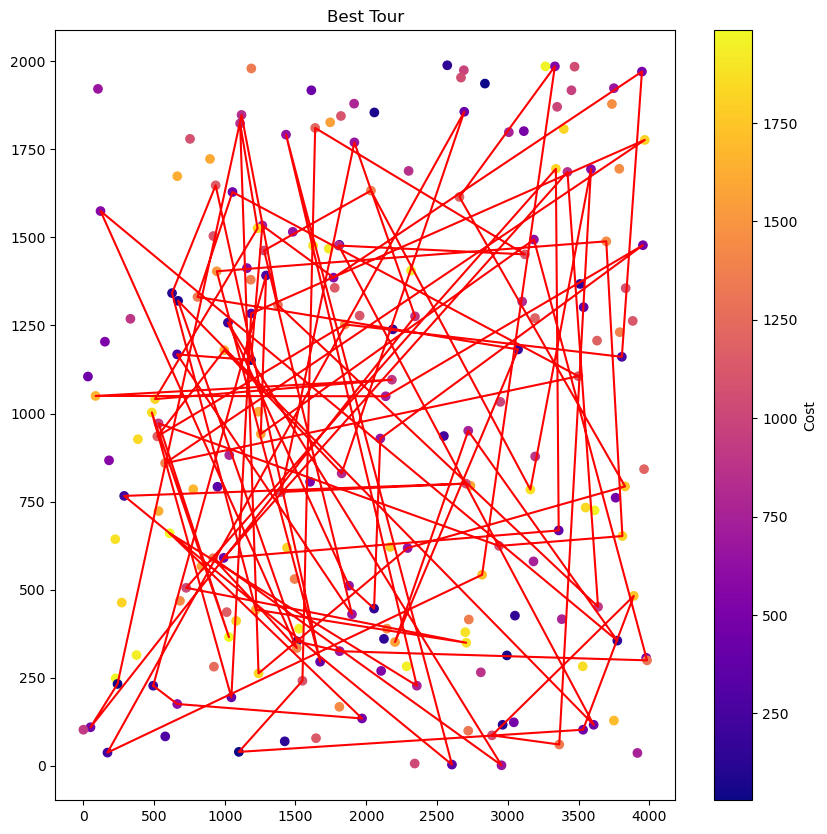

In [4]:
run_random_exp("../data/TSPA.csv")

Best cost: 240380.0
Worst cost: 296499.0
Mean cost after 200 solutions: 266304.945


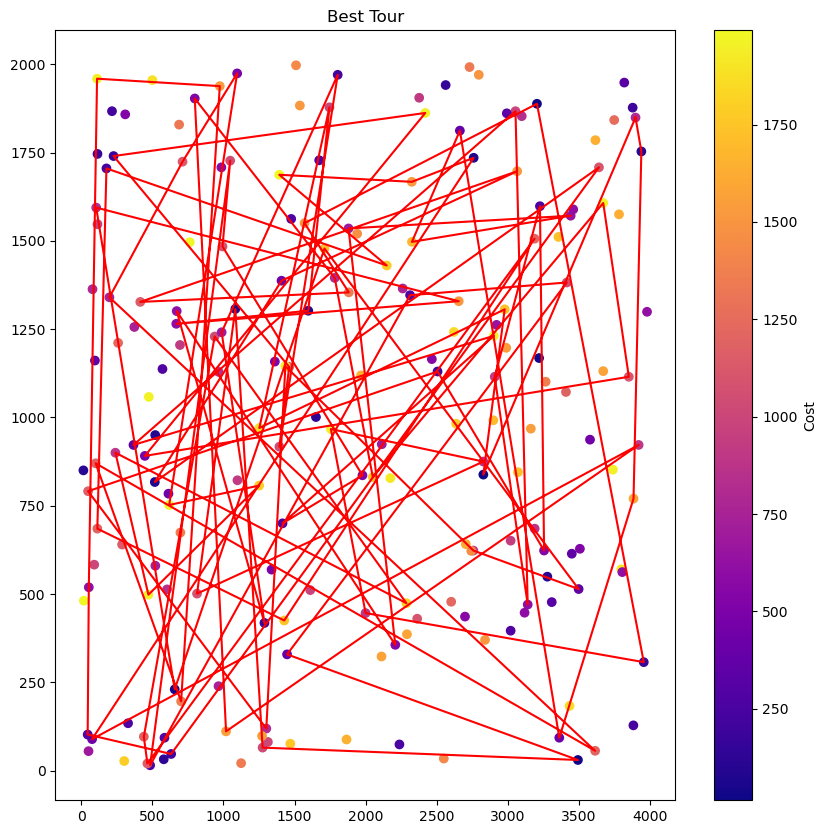

In [5]:
run_random_exp("../data/TSPB.csv")

Best cost: 188548.0
Worst cost: 239747.0
Mean cost after 200 solutions: 214950.675


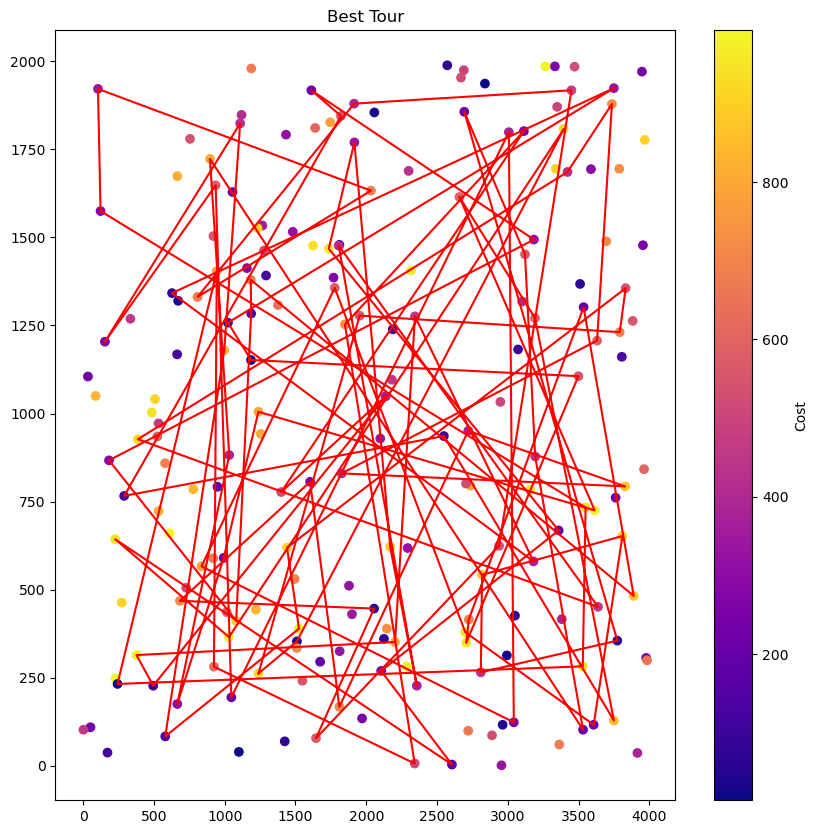

In [6]:
run_random_exp("../data/TSPC.csv")

Best cost: 194917.0
Worst cost: 246170.0
Mean cost after 200 solutions: 218555.1


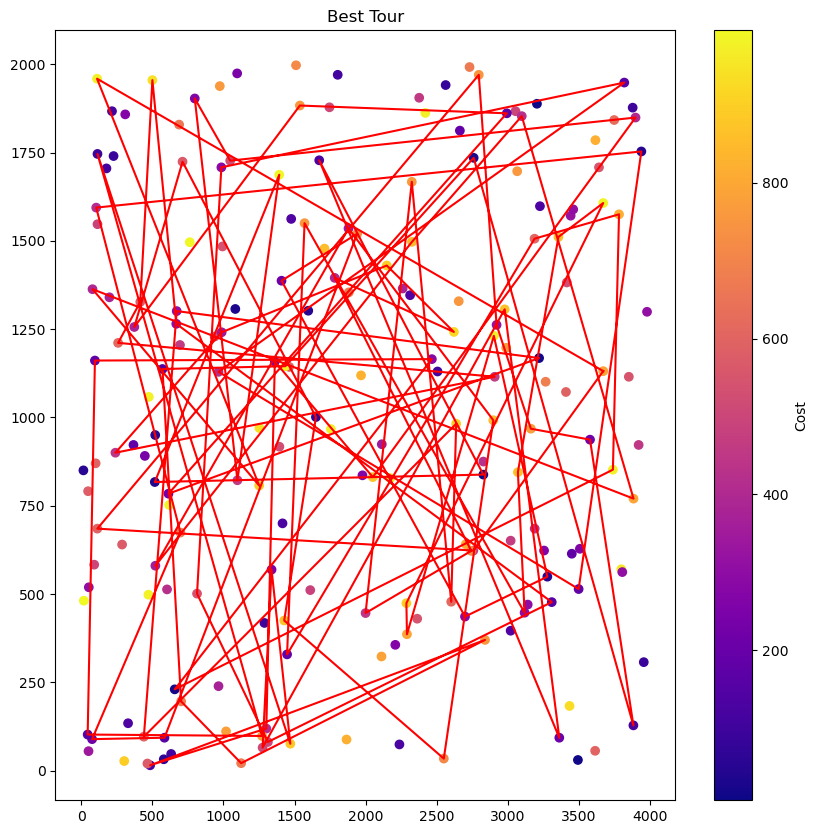

In [7]:
run_random_exp("../data/TSPD.csv")

## NEAREST NEIGHBOUR

#### PSEUDOCODE:

    function nearest_neighbour_solution(dist_matrix, starting_vertex):  
    
        n <- round_up(number_of_all_vertices / 2)

        temp_matrix = dist_matrix.copy()
        solution = [starting_vertex]
        current_vertex = starting_vertex
        for i in range(n-1):
            nearest_neighbour = argmin(temp_matrix[current_vertex])
    
            for i in range(temp_matrix.size):
                dist_matrix[i, current] = inf 
            for i in range(temp_matrix[current].size):
                dist_matrix[current, i] = inf
    
            current_vertex = nearest_neighbour
            solution.append(current_vertex)
    
        cost = 0
        for i in range(n):
            cost += dist_matrix[solution[i-1], solution[i]]
            

Best cost: 84471.0
Worst cost: 95013.0
Mean cost after 200 solutions: 87679.135


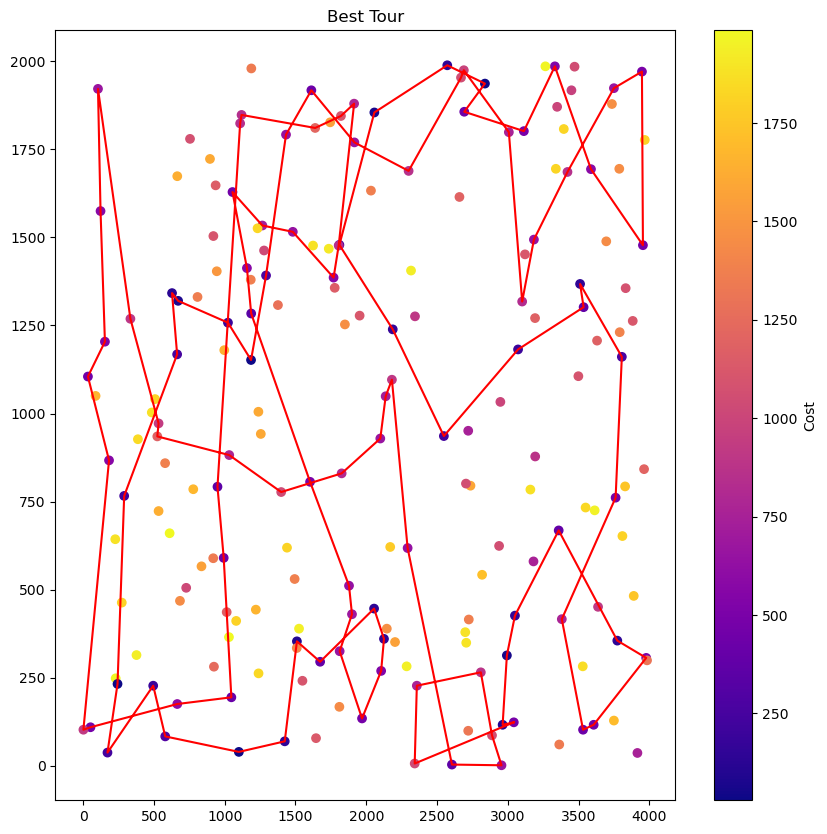

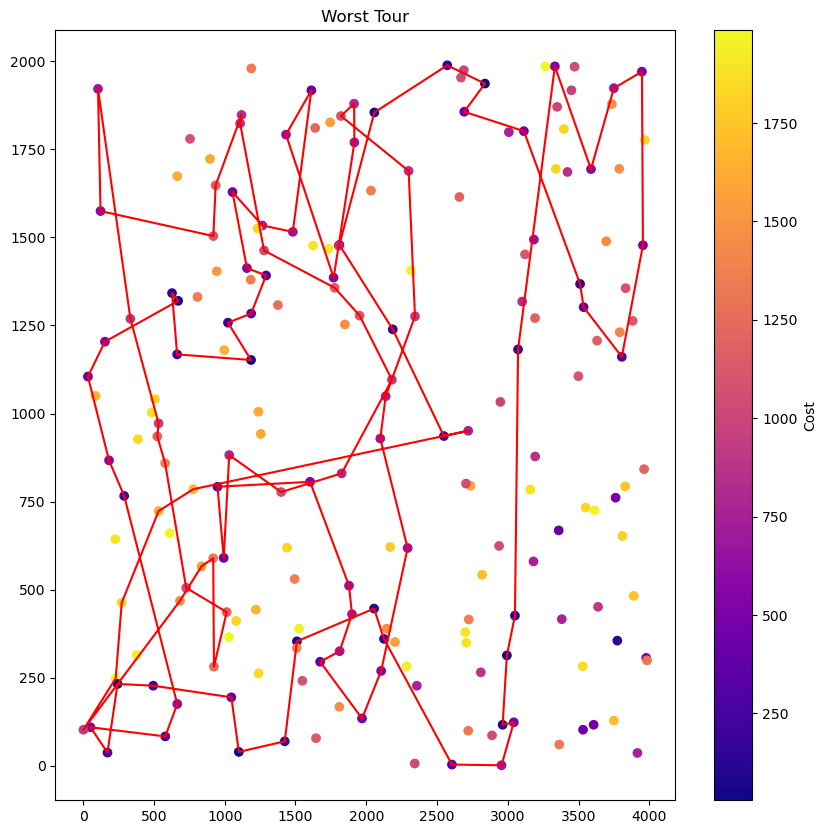

In [8]:
run_nn_exp("../data/TSPA.csv")

Best cost: 77448.0
Worst cost: 82631.0
Mean cost after 200 solutions: 79282.58


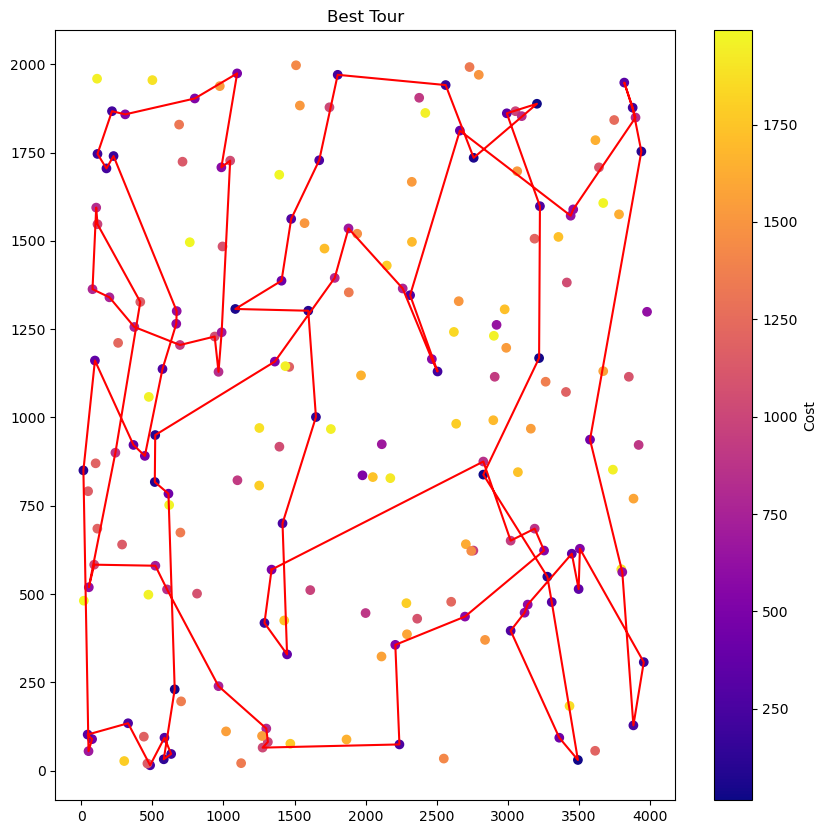

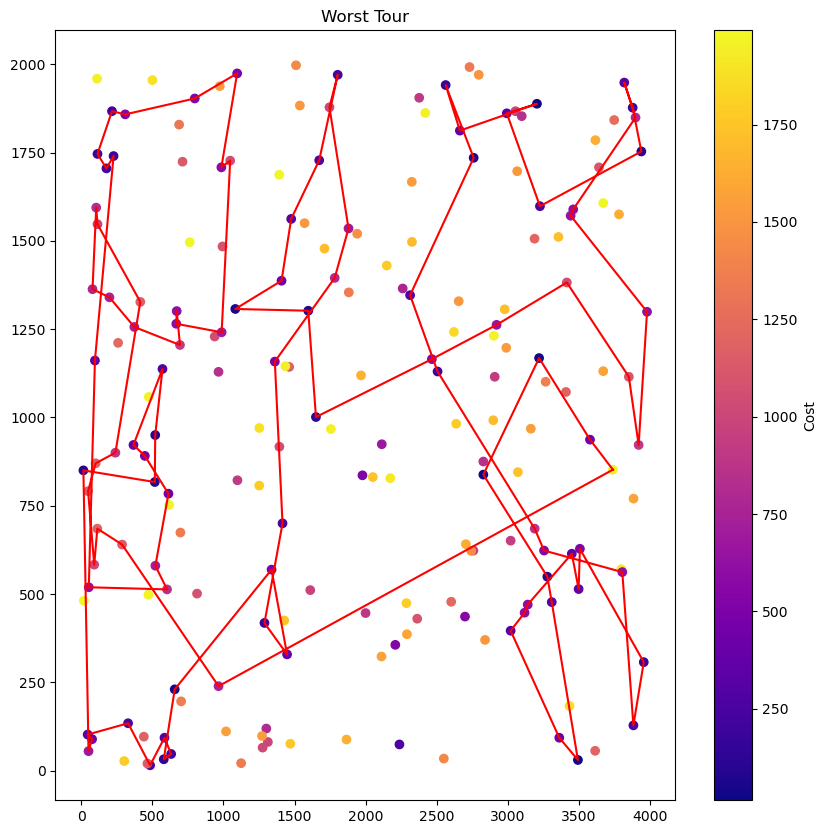

In [9]:
run_nn_exp("../data/TSPB.csv")

Best cost: 56304.0
Worst cost: 63697.0
Mean cost after 200 solutions: 58872.68


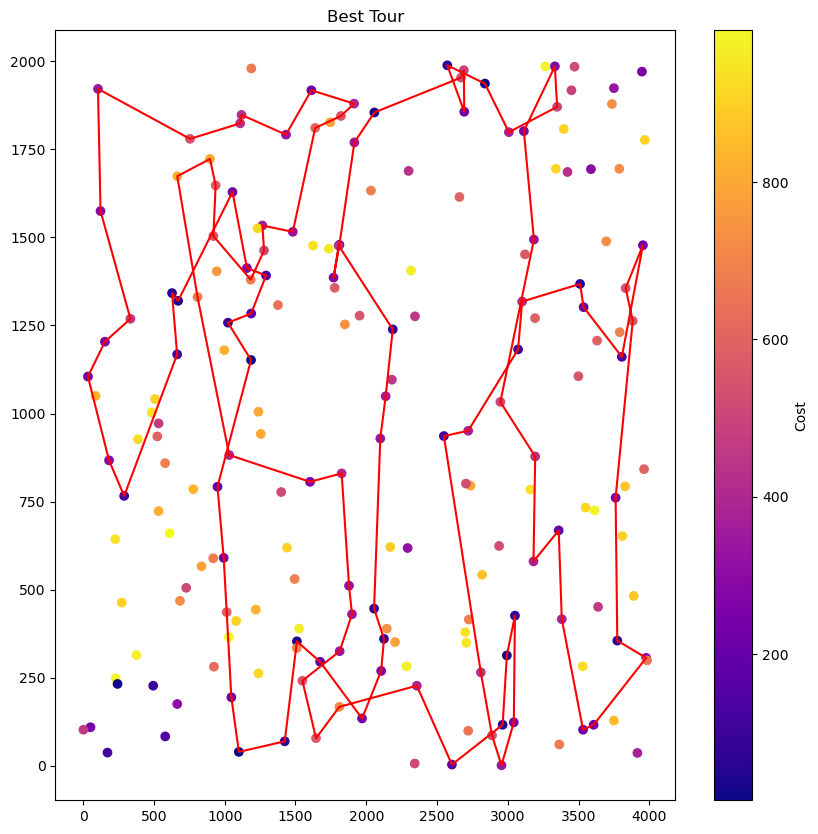

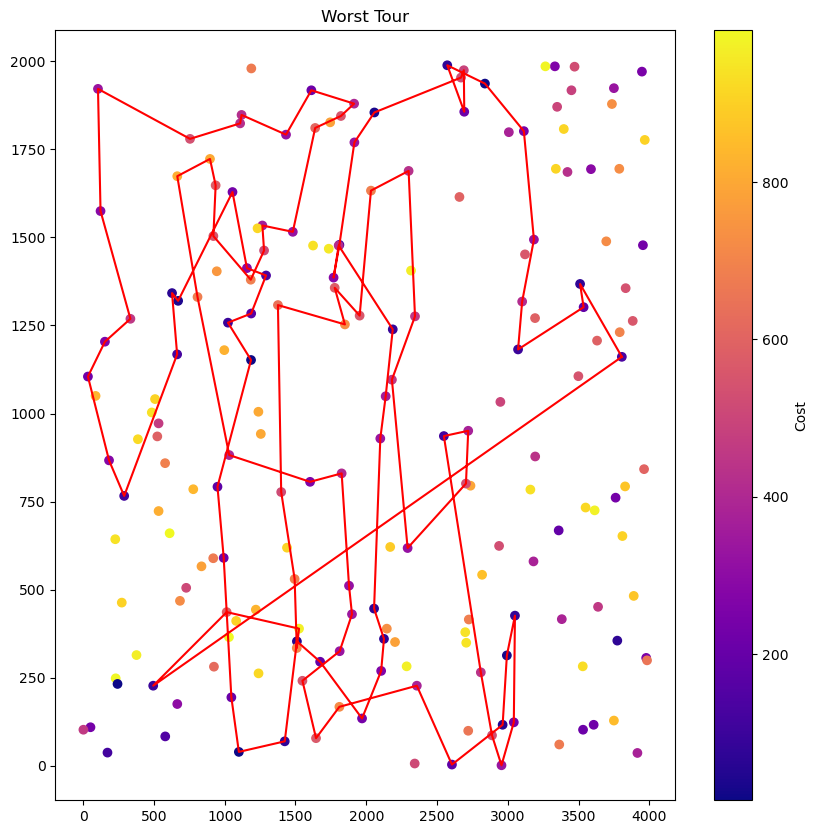

In [10]:
run_nn_exp("../data/TSPC.csv")

Best cost: 50335.0
Worst cost: 59846.0
Mean cost after 200 solutions: 54290.68


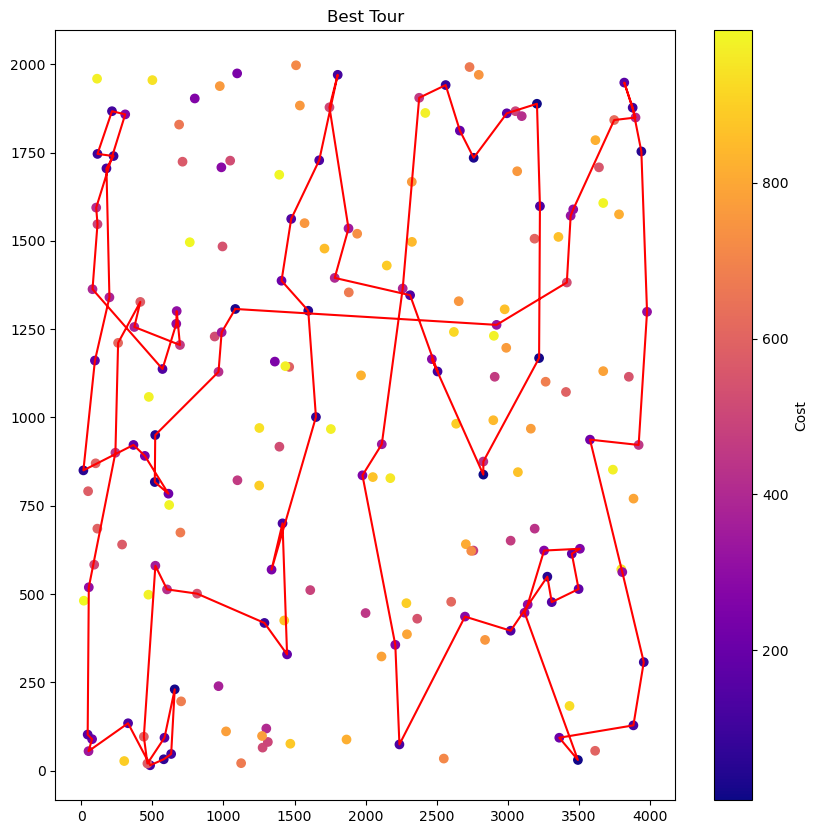

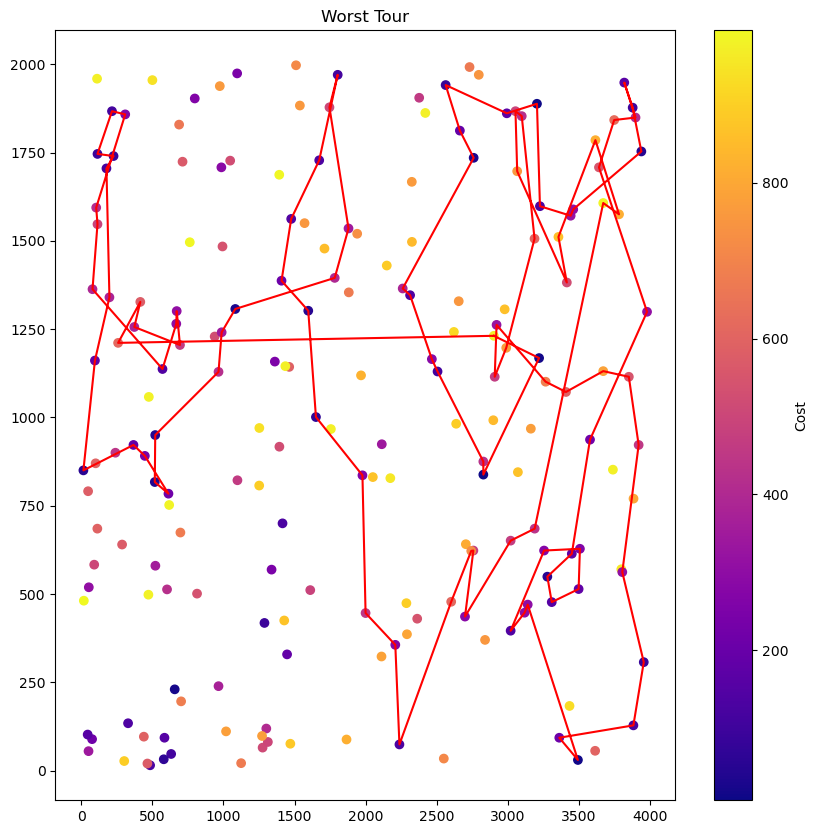

In [11]:
run_nn_exp("../data/TSPD.csv")

## GREEEDY CYCLE

#### PSEUDOCODE:

    function greedy_solution(dist_matrix, starting_vertex):  
    
        n <- round_up(number_of_all_vertices / 2)
        next_vertex <- argmin(dist_matrix[starting_vertex])

        temp_matrix = dist_matrix.copy()
        cycle = [starting_vertex, next_vertex]
        cost <- calculate_cost(cycle, dist_matrix)

        for _ in range(n-2):
            best_new_cost = inf
            best_new_cycle = cycle
    
            for i, v in enumerate(cycle):
            new_v = np.argmin(matrix[v])
            new_cycle = cycle[:i] + [new_v] + cycle[i:]            
            new_cost = calculate_cost(new_cycle, matrix_src)

            if new_cost < best_new_cost:
                best_new_cycle = new_cycle
                best_new_cost = new_cost
                chosen_v = new_v

            new_cycle = cycle[:i+1] + [new_v] + cycle[i+1:]       
            new_cost = calculate_cost(new_cycle, matrix_src)

            if new_cost < best_new_cost:
                best_new_cycle = new_cycle
                best_new_cost = new_cost
                chosen_v = new_v

            cycle = best_new_cycle
            cost = best_new_cost
            matrix[chosen_v, :] = np.inf
            matrix[:, chosen_v] = np.inf

        return cycle, cost
            

([0, 19], inf)
Best cost: inf
Worst cost: inf
Mean cost after 200 solutions: inf


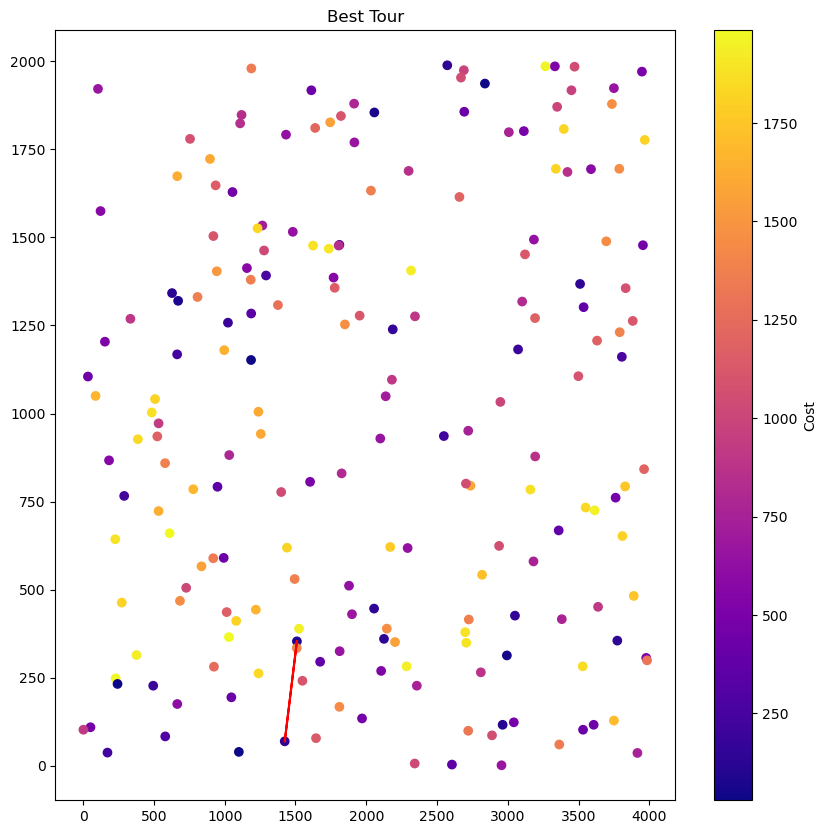

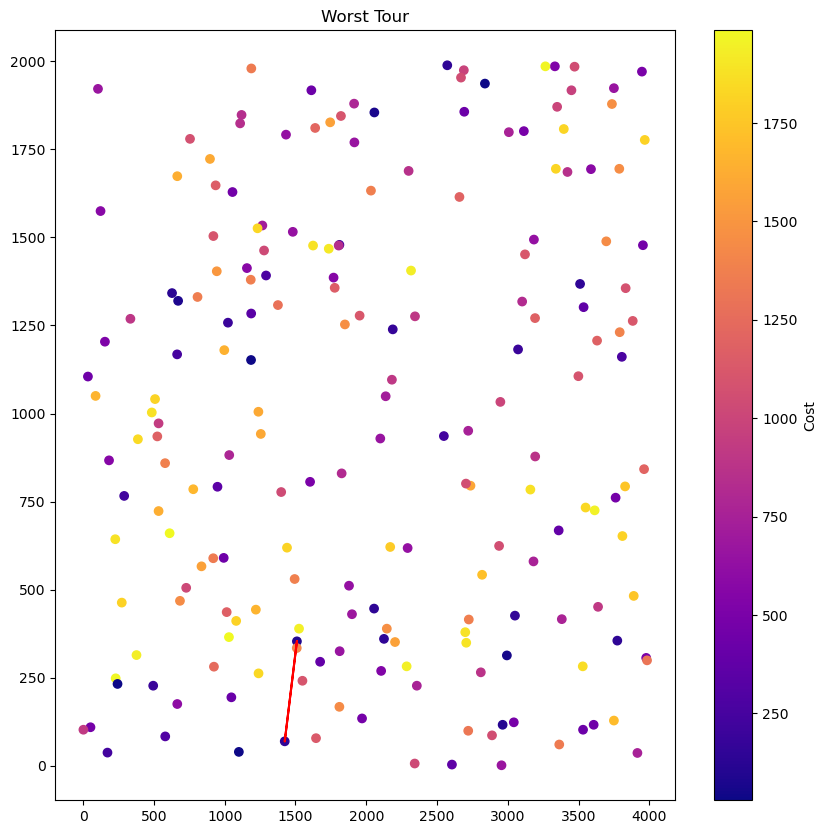

In [12]:
run_greedy_experiment("../data/TSPA.csv")

## CONCLUSIONS:

### Results:

| Experiment | Algorithm  | MIN   | MAX   | AVG over 200   |
|-----------|----------|----------|----------|----------|
| TSPA    | RANDOM | 241153 | 298242 | 264750.185 |
| TSPA    | NEAREST_N  | 84471 | 95013 | 87679.135 |
| TSPA    | G_CYCLE  | min | max | avg |
|-----------|----------|----------|----------|----------|
| TSPB    | RANDOM | 240380 | 296499 | 266304.945 |
| TSPB    | NEAREST_N  | 77448 | 82631 | 79282.58 |
| TSPB    | G_CYCLE  | min | max | avg |
|-----------|----------|----------|----------|----------|
| TSPC    | RANDOM | 188548 | 239747 | 214950.675 |
| TSPC    | NEAREST_N  | 56304 | 63697 | 58872.68 |
| TSPC    | G_CYCLE  | min | max | avg |
|-----------|----------|----------|----------|----------|
| TSPD    | RANDOM  | 194917 | 246170 | 218555.1 |
| TSPD    | NEAREST_N  | 50335 | 59846 | 54290.68 |
| TSPD    | G_CYCLE  | min | max | avg |



1. Switching from random solution to nearest neighbour already gives us much better performance.
2. 
3.
